In [2]:
import pandas as pd
import numpy as np

data_cu_2=pd.read_csv('../Data/01_Courses_usagers/2023_02/All_data_courses.csv', sep=";")
data_remp_2=pd.read_csv('../Data/02_Historique_remplissage_stations/2023_02/All_data_remplissage.csv', sep=",")
data_mouv_2=pd.read_excel('../Data/03_Régulation_mouvements_stations/2023_02/2023-02-01_Mouvements_de_régulation.xlsx')
data_remp_2.head()

,code_station,station_name,longitude,latitude,Date_Update,VM_Av,VAE_AV,VM_Unav,VAE_Unav,Nb_Diap_av,VM_av_StatPlus,VAE_av_StatPlus,VM_Unav.1,VAE_Unav.1,Cable_av
0,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-02-01 00:00:00,1,0,0,0,16,0,0,0,0,NaN
1,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-02-01 00:02:00,1,0,1,0,15,0,0,0,0,NaN
2,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-02-01 03:25:00,1,1,1,0,14,0,0,0,0,NaN
3,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-02-01 06:15:00,1,0,1,0,15,0,0,0,0,NaN
4,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-02-01 06:29:00,1,1,1,0,14,0,0,0,0,NaN


Ici je détermine le taux de remplissage moyen par station en supposant que la capicité totale est le nombre de dispo+indispo

In [3]:
data_remp_2['dispo']=data_remp_2['VM_Av']+data_remp_2['VAE_AV']
data_remp_2['indis']=data_remp_2['VM_Unav']+data_remp_2['VAE_Unav']+data_remp_2['VAE_Unav.1']
data_remp_2['occ']=data_remp_2['dispo'] / (data_remp_2['dispo']+data_remp_2['indis'])

In [4]:
occupation=data_remp_2.groupby('station_name')['occ'].mean().reset_index()
occupation.sort_values(by=['occ'])

,station_name,occ
79,Batignolles - Rome,0.608584
1159,Raymond Poincaré - Place Victor Hugo,0.629632
187,Ceinture du Lac Inferieure - Saint-Cloud,0.655688
372,Etienne Jodelle - Saint Ouen,0.664400
989,Place Jean-Baptiste Clément,0.673350
...,...,...
810,Maxime Gorki - Louis Aragon,0.993166
1311,Stalingrad - Henri Luisette,0.994103
895,Parc de Sceaux - Centre-Ville,0.995367
131,Borrégo - Gambetta,0.998550


In [5]:
data_mouv_2

,Nom station prise,Latitude station prise,Longitude station prise,Nom station dépose,Latitude station dépose,Longitude station dépose,Total,VAE,VM
0,Pierre Lefaucheux - Traversière,48.824352,2.241791,Sablons - Georges Mandel,48.863875,2.281890,6,0,6
1,Boussingault - Tolbiac,48.826035,2.342177,Harpe - Saint-Germain,48.851519,2.343670,6,0,6
2,Champeaux - Gallieni,48.864459,2.416178,Terroirs de France - Lheureux,48.832120,2.388618,6,0,6
3,Wurtz - Tolbiac,48.826312,2.344586,Place d'Italie - Soeur Rosalie,48.831909,2.354694,3,0,3
4,Jouffroy d'Abbans - Wagram,48.881973,2.301132,Courcelles - Place des Ternes,48.878200,2.299286,9,5,4
5,Jean Lolive - Parc Stalingrad,48.892062,2.409174,Toffier Decaux - Cartier Bresson,48.901651,2.401755,10,5,5
6,René Coty - Parc Montsouris,48.824791,2.336125,Gare Montparnasse - René Mouchotte,48.839204,2.320884,15,5,10
7,Hôtel de Ville de Boulogne Billancourt,48.834959,2.241680,Porte Molitor,48.845248,2.256902,15,3,12
8,Pont De Charenton,48.817968,2.419953,Place de la Gare,48.802534,2.427504,4,0,4
9,Hôpital - Campo-Formio,48.835405,2.358218,Chevreuse - Montparnasse,48.841739,2.331552,3,0,3


Ici je repère quel est le jour le moins actif et quelle est l'heure la moins actif. Une date de départ et une date d'arrivée content chaque comme 1 activité

In [6]:
data_cu_2['date_depart'] = pd.to_datetime(data_cu_2['date_depart'])
data_cu_2['date_arrive'] = pd.to_datetime(data_cu_2['date_arrive'])

# Concaténer les deux colonnes pour obtenir toutes les activités dans une seule série
all_activities = pd.concat([data_cu_2['date_depart'], data_cu_2['date_arrive']])

# Extraire l'heure de chaque activité
all_activities_hour = all_activities.dt.hour

# Trouver l'heure la moins fréquente
min_hour = all_activities_hour.value_counts().idxmin()

# Extraire le jour de chaque activité
all_activities_day = all_activities.dt.date

# Trouver le jour le moins fréquent
min_day = all_activities_day.value_counts().idxmin()

print("Moment de la journée avec le moins d'activité:", min_hour, "h00")
print("Journée avec le moins d'activité:", min_day)

Moment de la journée avec le moins d'activité: 4 h00
Journée avec le moins d'activité: 2022-11-05


Création d'un dataframe indiquant le nombre de départ et le nombre d'arrivées par station

In [7]:
# Compter le nombre de départs par station
depart_counts = data_cu_2['from_stat'].value_counts()

# Compter le nombre d'arrivées par station
arrivee_counts = data_cu_2['to_stat'].value_counts()

# Créer un dataframe avec les stations, le nombre de départs et le nombre d'arrivées
activite_station = pd.DataFrame({
    'Station': depart_counts.index,
    'Nb_departs': depart_counts.values,
    'Nb_arrivees': arrivee_counts.reindex(depart_counts.index, fill_value=0).values
})

activite_station['remplissage']=activite_station['Nb_arrivees']-activite_station['Nb_departs'] #correspond au nombre de vélos en + ou en - sur 6 mois
activite_station

,Station,Nb_departs,Nb_arrivees,remplissage
0,Gare Saint-Lazare - Cour du Havre,10057,10137,80
1,Gare de Lyon - Place Louis Armand,9785,9866,81
2,Richard Lenoir - Place de la Bastille,9659,9574,-85
3,Place Mireille Havet,9042,8904,-138
4,Petites Ecuries - Faubourg Saint-Denis,8188,8089,-99
...,...,...,...,...
1421,Combox Volante - atelier villeneuve,3,0,-3
1422,Stade Pershing,2,2,0
1423,station formation alfortville,1,0,-1
1424,Saint-Germain - Verdun,1,0,-1


Idée: faire des couples de stations avec une en remplissage négatif et une remplissage positive. Les couples seront formés en fonction de leur distance où la distance corrospond à la latitude, la longitude et la valeur absolue de remplissage; avec ces 3 données centrées réduites. Il faut adapter le code pour avoir un remplissage celon le type de vélo. Problème: si une station à un remplissage négatif pour les vélos électriques et positif pour les autres vélos, il faut faire un aller-retour. Solution former des couples par type de vélo. Remarque: la latitude et la longitude ne sont pas des bons représentatifs de distance car les navettes ne se déplacent pas en distance euclidienne, la durée et la distance parcourue peuvent donner un meilleur apercu de la distance à parcourir par la navette.

In [23]:
#Ajout de cette ligne de code simplifier les calculs et les résultats suivants
activite_station=activite_station.loc[:10,]

In [25]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix

features=['remplissage', 'Latitude station prise', 'Longitude station prise']
# Séparer les stations en fonction du remplissage
stations_remplissage = activite_station[activite_station['remplissage'] > 0].copy()
stations_vidage = activite_station[activite_station['remplissage'] < 0].copy()
stations_vidage['remplissage']=np.abs(stations_vidage['remplissage'])

In [26]:
#Le nombre de vélos entrant n'est pas égale au nombre de vélos sortant. 2 vélos sont perdus dans la nature. On décide donc de supprimer 2 stations auxquelles il manque 1 vélo.
#stations_vidage = stations_vidage.drop(1424).drop(1425)

KeyError: '[1424] not found in axis'

In [27]:
stations = data_cu_2.loc[:, ['from_stat', 'Latitude_start', 'longitude_start']].drop_duplicates().reset_index().drop(columns=['index'])
stations = stations.rename(columns={'from_stat': 'nom', 'Latitude_start': 'latitude', 'longitude_start': 'longitude'})
stations

,nom,latitude,longitude
0,Jean Moulin - Paul Doumer,48.862218,2.455334
1,Lucie Aubrac - Franklin,48.862239,2.443586
2,Docteurs Déjérine - Pte de Montreuil,48.853984,2.412083
3,Jules Vallès - Charonne,48.854284,2.384767
4,Gare de l'Est - Place du 11 Novembre 1918,48.876327,2.358546
...,...,...,...
1466,Quai Panhard et Levassor,48.828167,2.384425
1467,Ney - Porte de Montmartre,48.897921,2.336836
1468,Jean Macé - Faidherbe,48.852860,2.383449
1469,Centenaire - Sorins,48.857917,2.427114


In [30]:
pos_station_vidage = stations.loc[stations['nom'].isin(stations_vidage['Station']), :]
pos_station_remplissage = stations.loc[stations['nom'].isin(stations_remplissage['Station']), :]

pos_station_remplissage=pos_station_remplissage.drop_duplicates(subset=['nom']).reset_index(drop=True)
pos_station_vidage=pos_station_vidage.drop_duplicates(subset=['nom']).reset_index(drop=True)
stations_remplissage=stations_remplissage.reset_index(drop=True)
stations_vidage=stations_vidage.reset_index(drop=True)
pos_station_vidage

,nom,latitude,longitude
0,Gare RER de Vincennes,48.847563,2.433383
1,Place Mireille Havet,48.850533,2.383756
2,Richard Lenoir - Place de la Bastille,48.853833,2.369722
3,Pau Casals - Neuve Tolbiac,48.831160,2.377439
4,Petites Ecuries - Faubourg Saint-Denis,48.872871,2.354215
5,Gare Montparnasse - Vaugirard,48.841807,2.319510


Text(0.5, 1.0, 'stations de vélos')

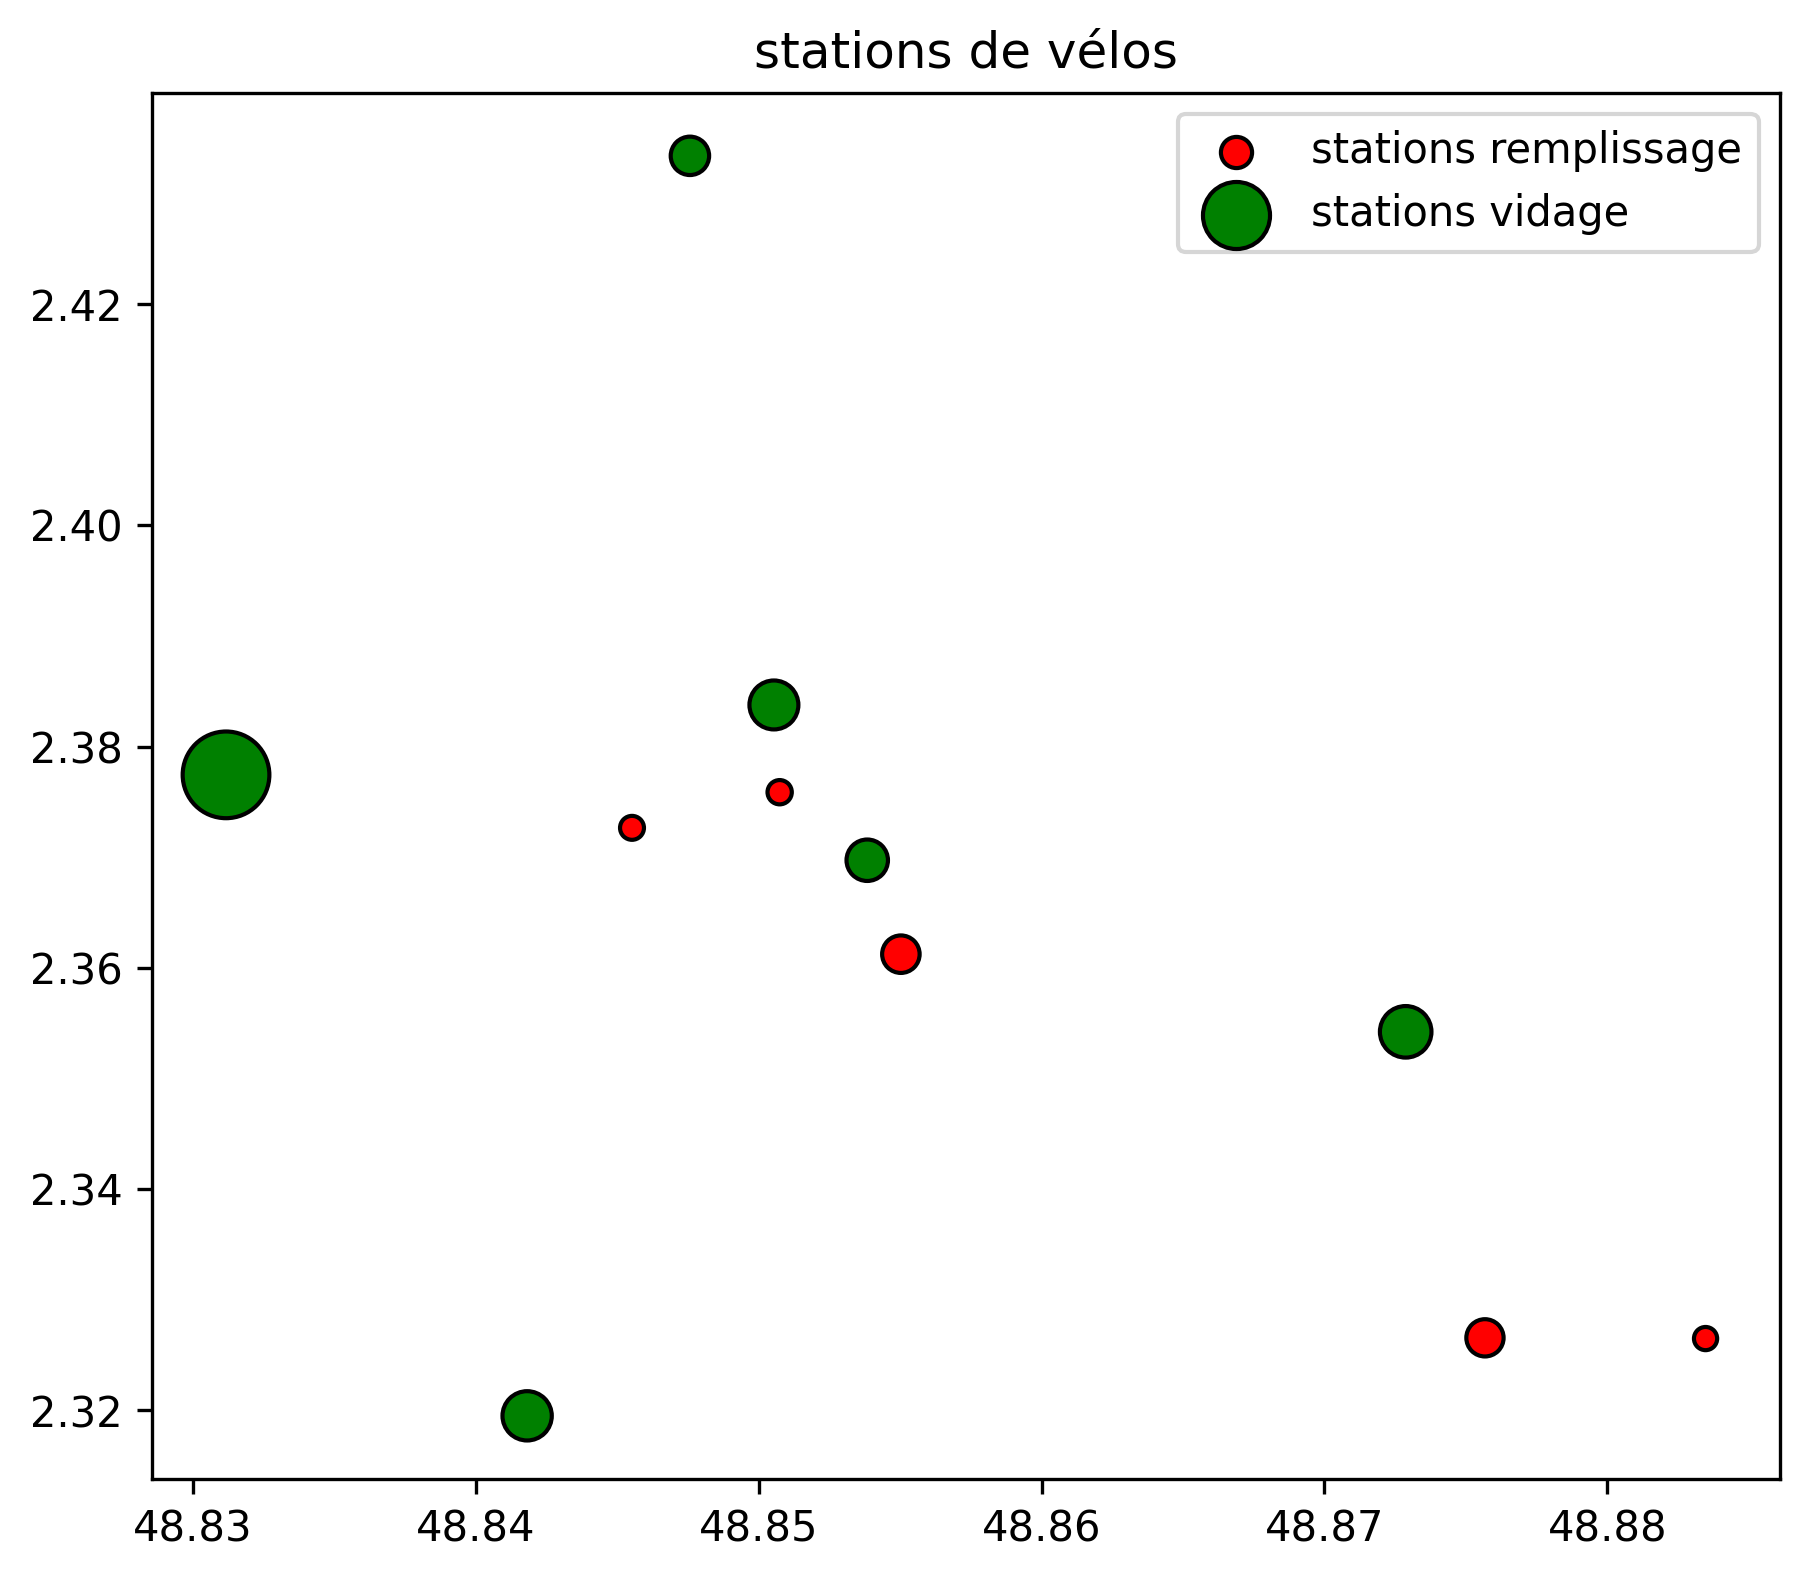

In [31]:
import pylab as pl
import ot
import time

pl.figure(1,(7,6))
pl.clf()
pl.scatter(pos_station_remplissage['latitude'], pos_station_remplissage['longitude'], s=stations_remplissage['remplissage'], c='red', ec='k', label='stations remplissage')
pl.scatter(pos_station_vidage['latitude'], pos_station_vidage['longitude'], s=stations_vidage['remplissage'], c='green', ec='k', label='stations vidage')
pl.legend()
pl.title('stations de vélos')

TypeError: text() missing 1 required positional argument: 's'

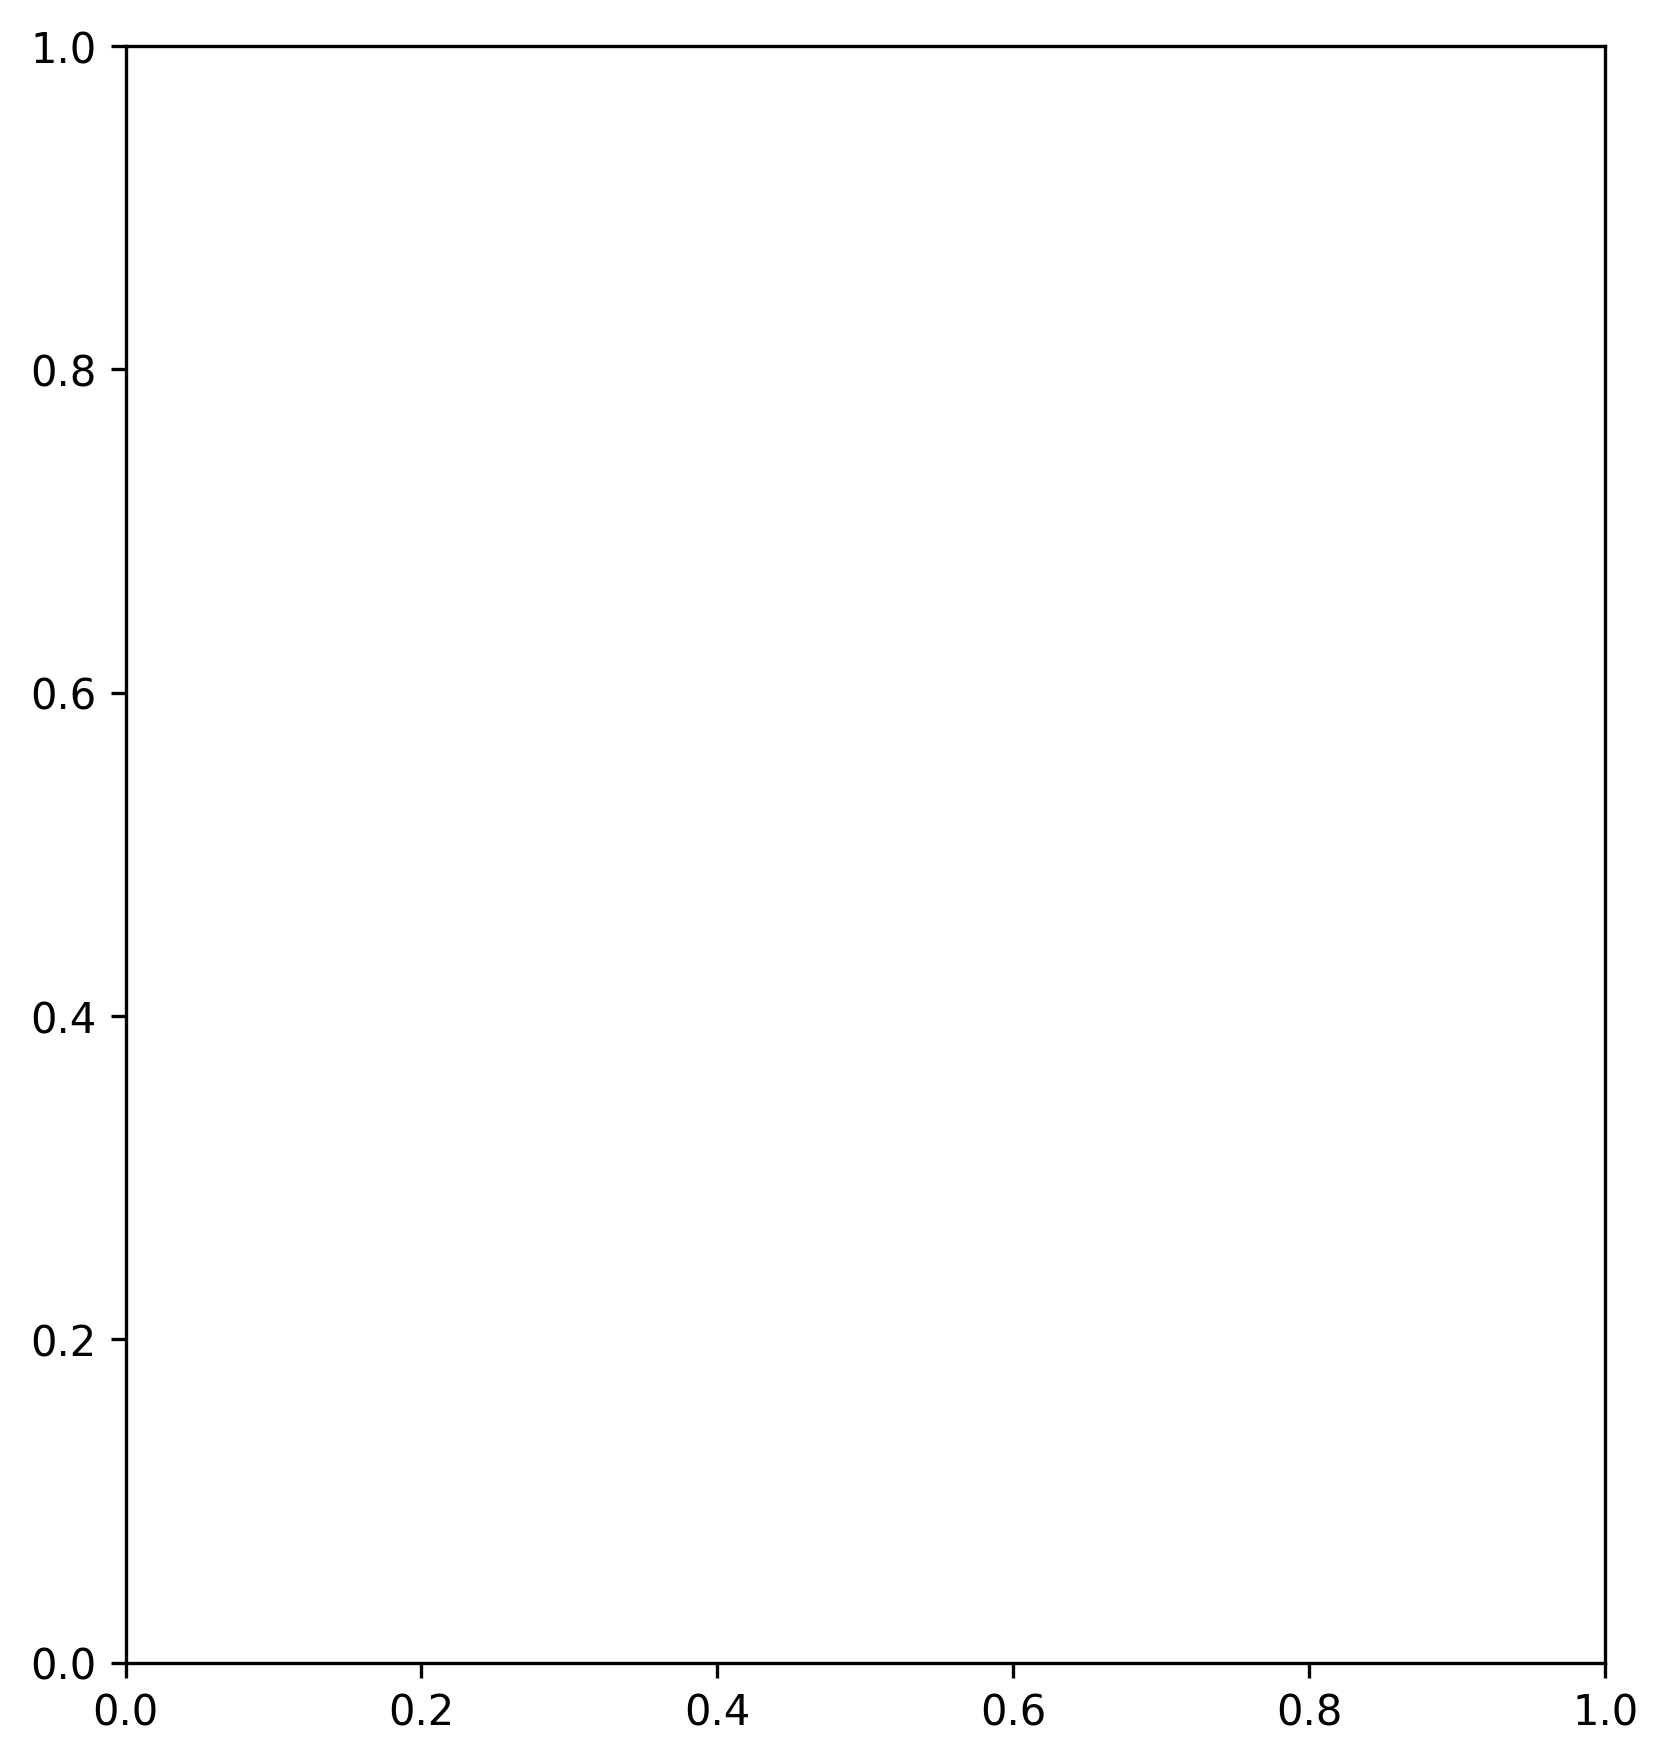

In [33]:
C = ot.dist(pos_station_remplissage[['latitude','longitude']].values, pos_station_vidage[['latitude','longitude']].values)

labels = [str(i) for i in range(len(stations_remplissage))]
f = pl.figure(2, (14, 7))
pl.clf()
pl.subplot(121)
#pl.imshow(Imap, interpolation='bilinear')
for i in range(len(stations_vidage)):
    pl.text(pos_station_vidage.loc[i, 'latitude'], pos_station_vidage.loc[i, 'longitude'], labels[i], color='blue', fontsize=14, fontweight='bold', ha='center', va='center')
for i in range(len(stations_remplissage)):
    pl.text(pos_station_remplissage.loc[i, 'latitude'], pos_station_remplissage.loc[i, 'longitude'], labels[i], color='blue', fontsize=14, fontweight='bold', ha='center', va='center')
pl.title('stations en remplissage et en vidage')

ax = pl.subplot(122)
im = pl.imshow(C, cmap='coolwarm')
pl.title('matrice de coût')
#cbar = pl.colorbar(im, ax=ax, shrink=0.5, use_gridspec=True)
#cbar.ax.set_ylabel("cost", rotation=-90, va="bottom")

pl.xlabel('Stations vidage')
pl.ylabel('Stations remplissage')
#pl.tight_layout()

In [15]:
start = time.time()
ot_emd = ot.emd(stations_remplissage['remplissage'].values, stations_vidage['remplissage'].values, C)
time_emd = time.time() - start

C:\Users\jinsn\AppData\Local\Temp\ipykernel_28128\953569336.py:2: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  ot_emd = ot.emd(stations_remplissage['remplissage'].values, stations_vidage['remplissage'].values, C)


In [ ]:
f = pl.figure(3, (14,7))
pl.clf()
pl.subplot(121)
for i in range(len(pos_station_remplissage)):
    for j in range(len(pos_station_vidage)):
        pl.plot([pos_station_remplissage.loc[i,'latitude'], pos_station_vidage.loc[i,'latitude']], [pos_station_remplissage.loc[i,'longitude'], pos_station_vidage.loc[i,'longitude']], '-k', lw=3. * ot_emd[i, j] / ot_emd.max())
for i in range(len(pos_station_vidage)):
    pl.text(pos_station_vidage[i, 'latitude'], pos_station_vidage[i, 'longitude'], labels[i], color='b', fontsize=14, fontweight='bold', ha='center', va='center')
for i in range(len(pos_station_vidage)):
    pl.text(pos_station_remplissage[i, 'latitude'], pos_station_remplissage[i, 'longitude'], color='red', fontsize=14, fontweight='bold', ha='center', va='center')
pl.title('Stations en remplissage et en vidage')

Text(0, 0.5, 'stations remplissage')

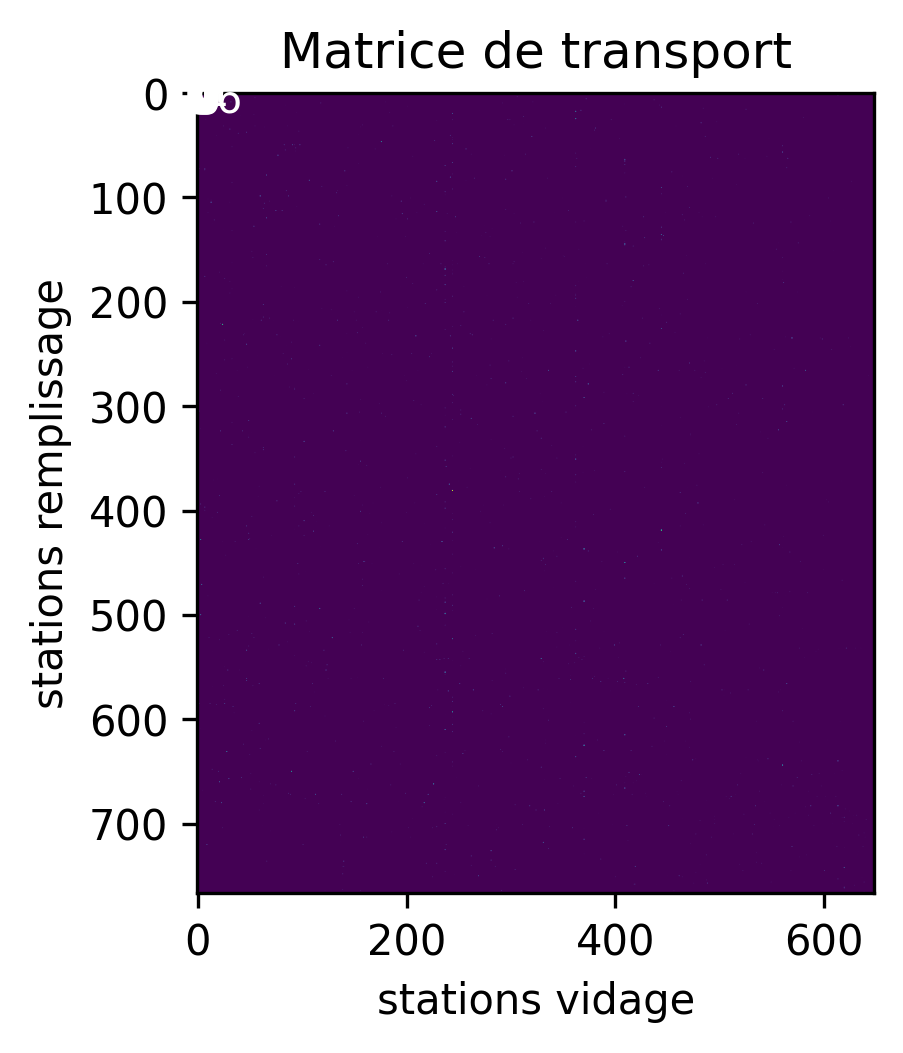

In [19]:
ax = pl.subplot(122)
im = pl.imshow(ot_emd)
for i in range(len(stations_remplissage)):
    for j in range((len(stations_vidage))):
        text = ax.text(j, i, '{0:g}'.format(ot_emd[i, j]), ha="center", va="center", color="w")

pl.title('Matrice de transport')
#pl.rcParams['figure.dpi'] = 300
#pl.rcParams['savefig.dpi'] = 300

pl.xlabel('stations vidage')
pl.ylabel('stations remplissage')

In [ ]:
stations_remplissage['remplissage'].shape